Student Performance Indicator

1) Problem Statement

This project understands how the student performance is effecting by other variables including Gender, Ethnicity, Parental level of education, Lunch 
and Test Preparation Course.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Import the CSV Data as Pandas DataFrame

In [3]:
df= pd.read_csv(r"D:\Data Analyst\ML_Project\src\Notebook\student.csv")

In [4]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Shape of dataset (rowxcolumns)

In [5]:
df.shape

(1000, 8)

Data Checks to perform
1. Check for missing values
2. Check for duplicates
3. Check the datatypes
4. Check for number of unique values with an attribute
5. Check statistical analysis
6. Check the categories of attributes

In [6]:
# Check for missing values

df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#check for duplicates

df.duplicated().sum()

0

No duplicate values

In [8]:
# Check the datatypes and nullvalues

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Checking the number of unique values of each column

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
# Check statistics of data set

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Data Insight
From above description of numerical data, all means are very close to each other - between 66 and 68.05;
All standard deviations are also close - between 14.6 and 15.19;
While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
# Data Exploration

print("Categories in 'Gender' attribute: ", end=" ")
print(df['gender'].unique())
print("Categories in 'race_ethnicity' attribute: ", end=" ")
print(df['race/ethnicity'].unique())
print("Categories in 'parental level of education' attribute: ", end=" ")
print(df['parental level of education'].unique())
print("Categories in 'lunch' attribute: ", end=" ")
print(df['lunch'].unique())
print("Categories in 'test preparation course' attribute: ", end=" ")
print(df['test preparation course'].unique())



Categories in 'Gender' attribute:  ['female' 'male']
Categories in 'race_ethnicity' attribute:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' attribute:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' attribute:  ['standard' 'free/reduced']
Categories in 'test preparation course' attribute:  ['none' 'completed']


In [13]:
# Count of categorical and numerical features

Numeric_features = [features for features in df.columns if df[features].dtype != 'O']    # here capital O represents Object type including strings and mix data type but not integers
Categorical_Features = [features for features in df.columns if df[features].dtype == 'O']

print('We have {} Numerical features :{}'.format(len(Numeric_features), Numeric_features))
print('We have {} Categorical Features: {}'.format(len(Categorical_Features),Categorical_Features))


We have 3 Numerical features :['math score', 'reading score', 'writing score']
We have 5 Categorical Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
# Add columns for total score and average

df['Total_Score'] = df['math score']+ df['reading score']+df['writing score']
df['Average'] = df['Total_Score']/3

df.head(100)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
95,male,group C,associate's degree,free/reduced,completed,78,81,82,241,80.333333
96,male,group B,some high school,standard,completed,65,66,62,193,64.333333
97,female,group E,some college,standard,completed,63,72,70,205,68.333333
98,female,group D,some college,free/reduced,none,58,67,62,187,62.333333


In [15]:
#Check the count of students secure full marks in given subjects

reading_score_full = df[df['reading score']==100]['Average'].count()
writing_score_full = df[df['writing score']==100]['Average'].count()
Math_score_full = df[df['math score']==100]['Average'].count()

print(f"Count of students secure full marks in Reading:{reading_score_full}")
print(f"Count of students secure full marks in Writing:{writing_score_full}")
print(f"Count of students secure full marks in Math:{Math_score_full}")


Count of students secure full marks in Reading:17
Count of students secure full marks in Writing:14
Count of students secure full marks in Math:7


In [16]:
# Count of students score less than 20 marks

reading_score_full = df[df['reading score']<=20]['Average'].count()
writing_score_full = df[df['writing score']<=20]['Average'].count()
Math_score_full = df[df['math score']<=20]['Average'].count()

print(f"Count of students secure marks less than 20 in Reading:{reading_score_full}")
print(f"Count of students secure marks less than 20 in Writing:{writing_score_full}")
print(f"Count of students secure marks less than 20 in Math:{Math_score_full}")

Count of students secure marks less than 20 in Reading:1
Count of students secure marks less than 20 in Writing:3
Count of students secure marks less than 20 in Math:4


Insights
From above values we get students have performed the worst in Maths
Best performance is in reading section

Data Exploration (Data Visualization)
Visualize average score distribution to make some conclusion.
Histogram
Kernel Distribution Function (KDE)

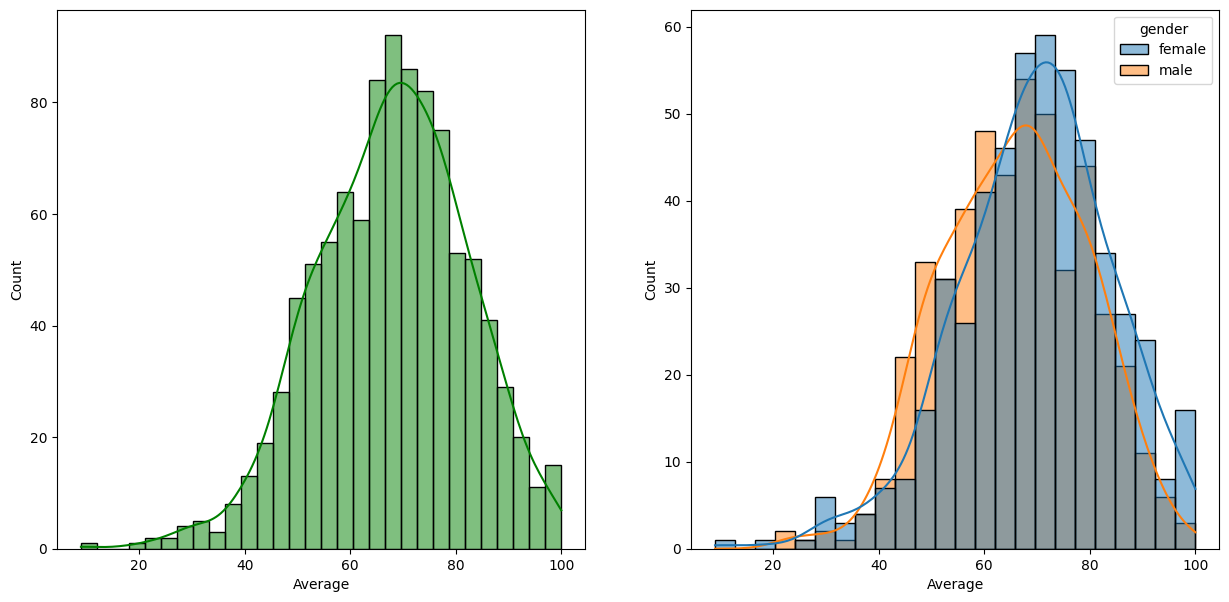

In [17]:
# Histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # axs is an array with 1 row and 2 columns

# Plotting on the first subplot
sns.histplot(ax=axs[0], data=df, x='Average', bins=30, kde=True, color='g')

# Plotting on the second subplot
sns.histplot(ax=axs[1], data=df, x='Average', kde=True, hue='gender')

plt.show()

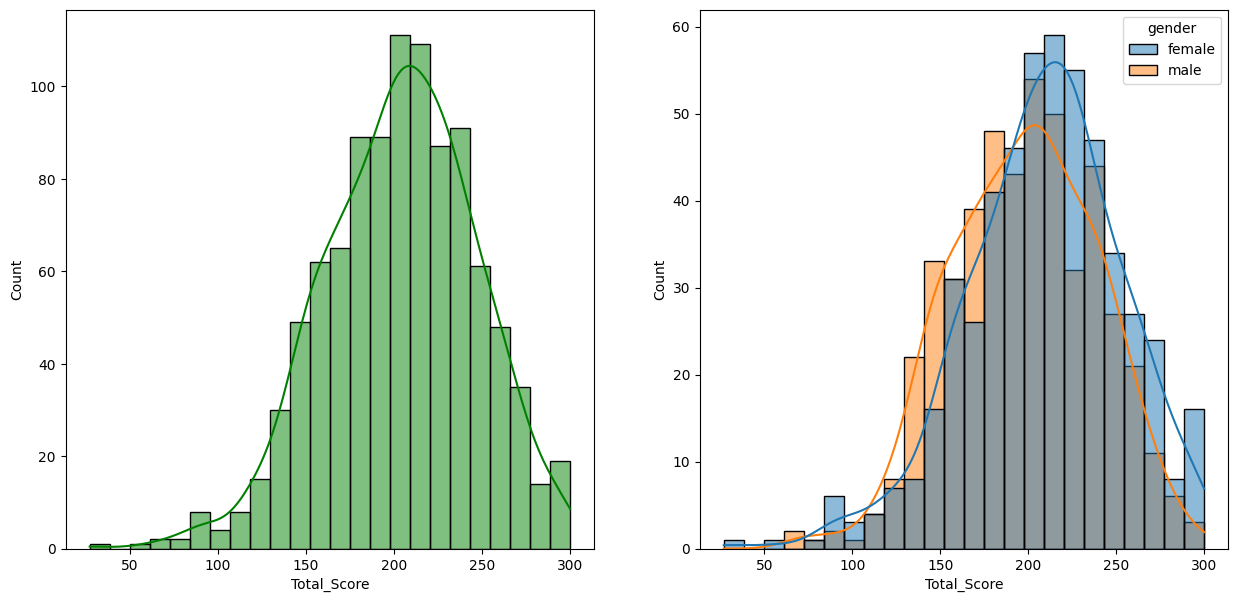

In [18]:
# Histogram with total score

fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Total_Score', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total_Score', kde=True, hue='gender')
plt.show()



Insight
Female students tend to perform well as compared to male students 

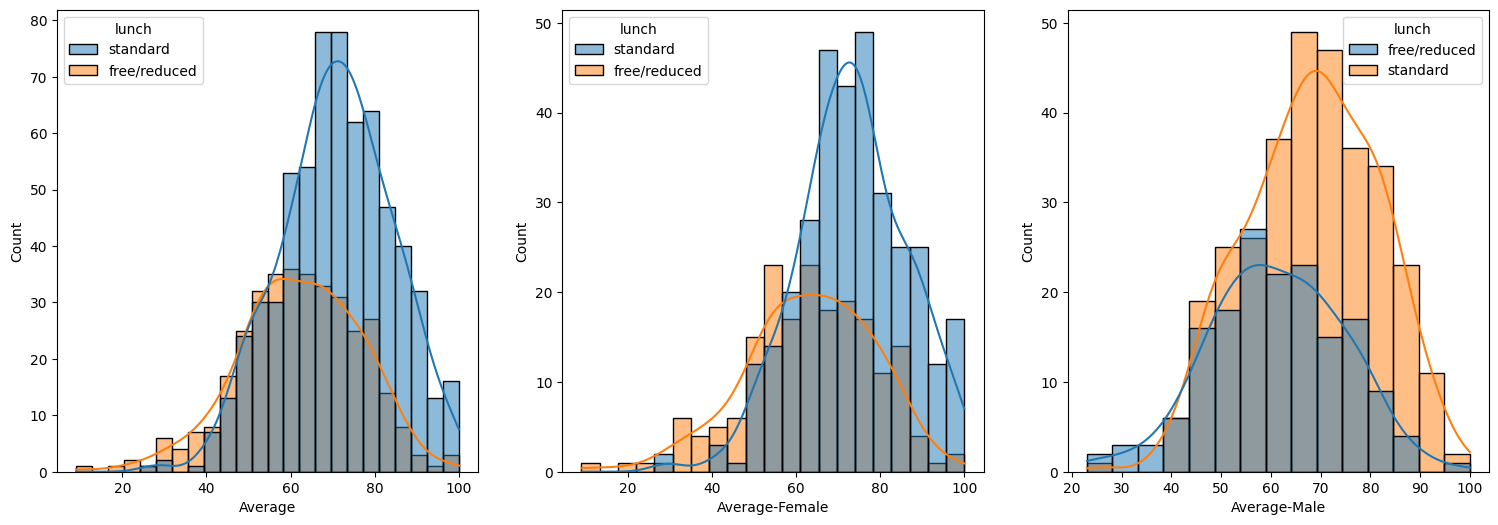

In [19]:
plt.subplots(1,3 , figsize= (25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.xlabel('Average-Female')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.xlabel('Average-Male')
plt.show()


Insights
Standard lunch helps perform well in exams.
Standard lunch helps perform well in exams be it a male or a female.

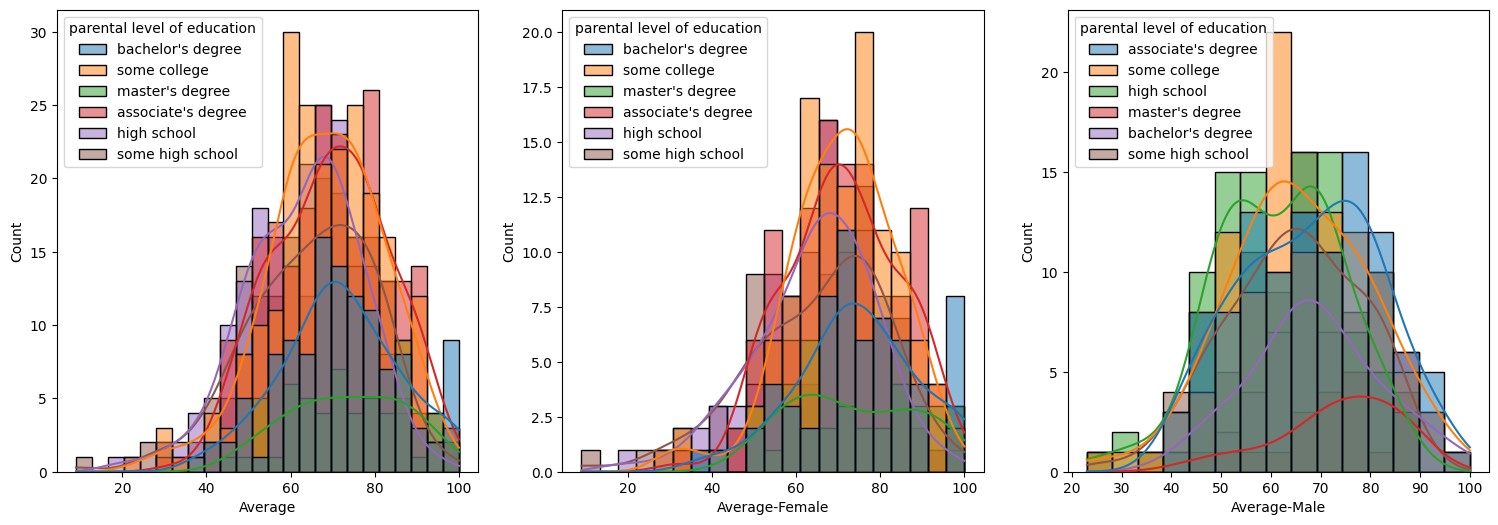

In [20]:
plt.subplots(1,3 , figsize= (25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.xlabel('Average-Female')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.xlabel('Average-Male')
plt.show()

Insights
In general parent's education don't help student perform well in exam.
2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3rd plot we can see there is no effect of parent's education on female students.

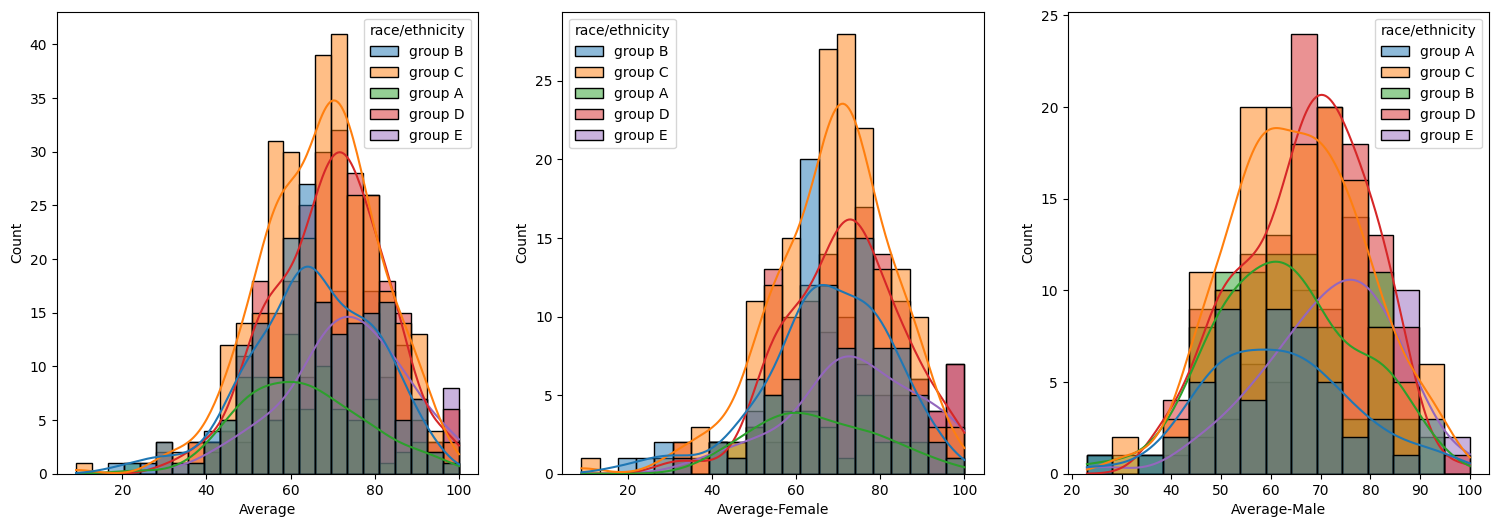

In [21]:
plt.subplots(1,3 , figsize= (25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.xlabel('Average-Female')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.xlabel('Average-Male')
plt.show()

Insights
Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

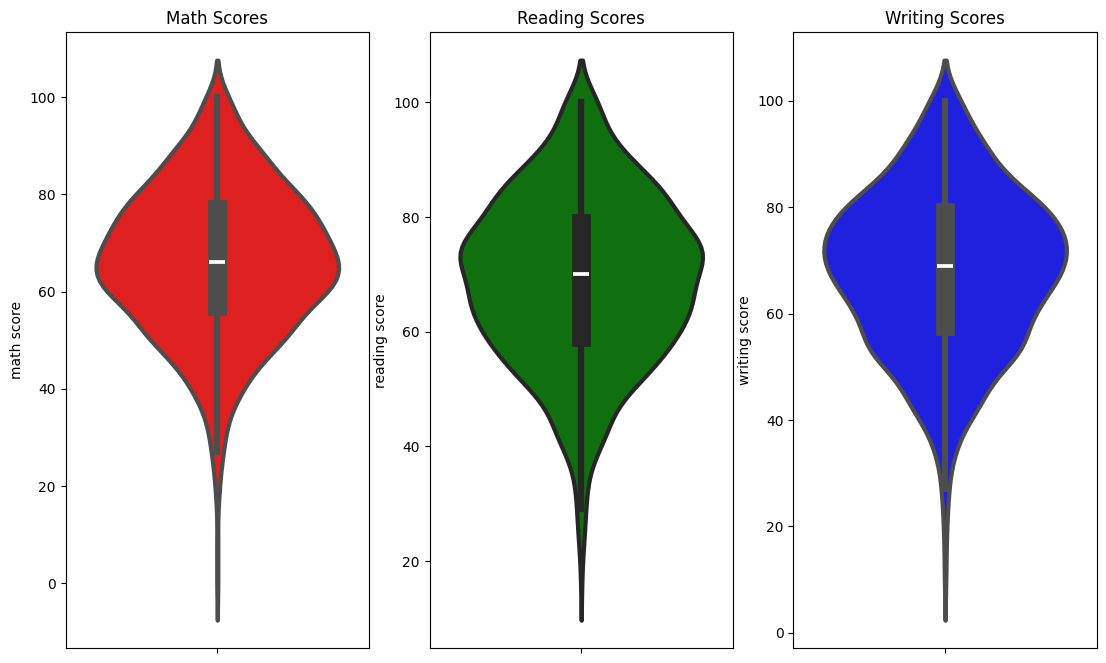

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title('Math Scores')
sns.violinplot(data=df, color='r',y='math score',linewidth=3)
plt.subplot(142)
plt.title('Reading Scores')
sns.violinplot(data=df, color='g',y='reading score',linewidth=3)
plt.subplot(143)
plt.title('Writing Scores')
sns.violinplot(data=df, color='b',y='writing score',linewidth=3)
plt.show()

Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

Multivariate analysis using pieplot

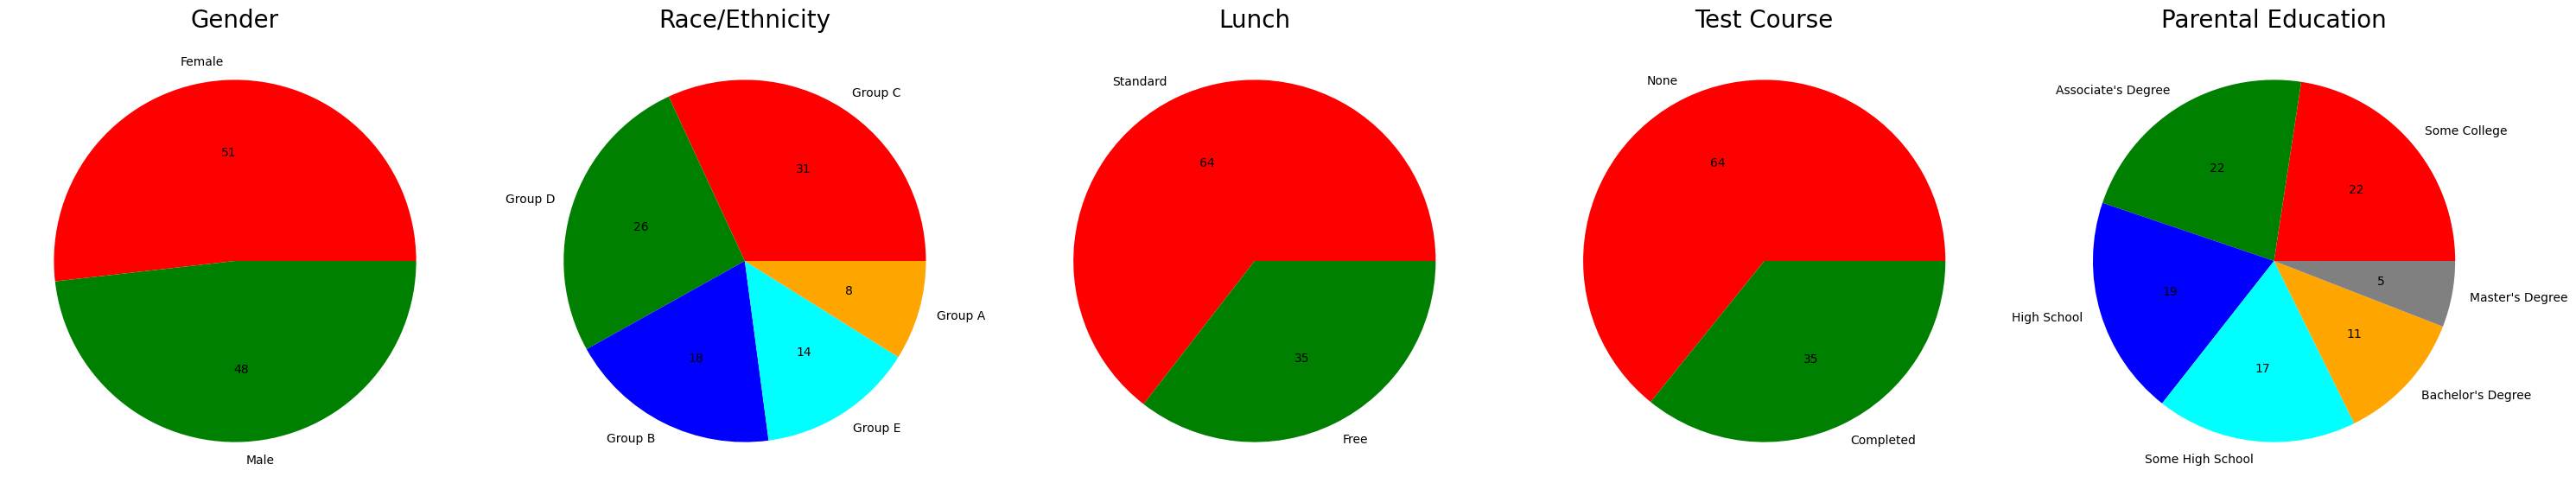

In [23]:
plt.rcParams['figure.figsize'] = (30, 12)
def func(pct):
    return f'{int(pct)}'

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = func)
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = func)
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = func)
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = func)
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = func)
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights
Number of Male and Female students is almost equal
Number students are greatest in Group C
Number of students who have standard lunch are greater
Number of students who have not enrolled in any test preparation course is greater
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Feature Wise Visualization
GENDER COLUMN
How is distribution of Gender ?
Is gender has any impact on student's performance ?

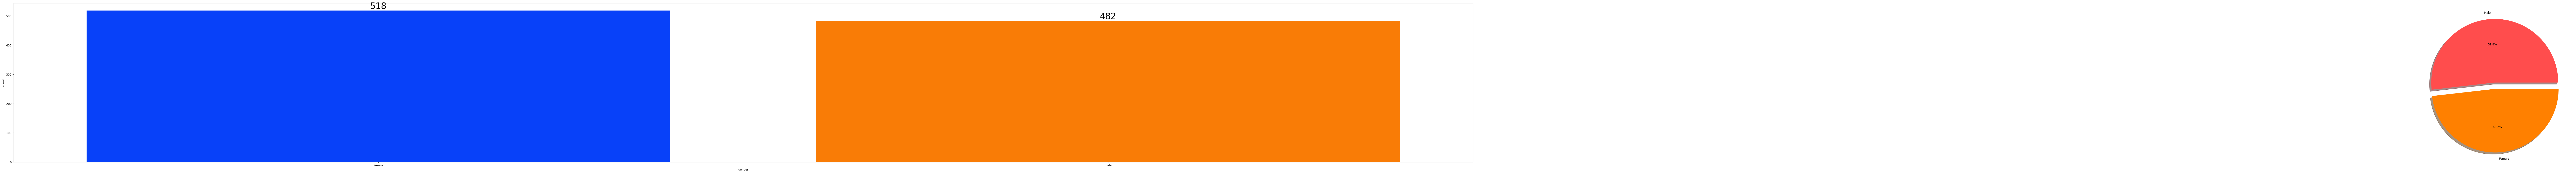

In [24]:
#UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

fig, ax= plt.subplots(1,2,figsize=(201,10))
sns.countplot(x=df['gender'], palette='bright',data=df,ax= ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size= 30)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [25]:
numeric_columns = df.select_dtypes(include='number').columns

# Perform the groupby operation on the numeric columns
gender_group = df.groupby('gender')[numeric_columns].mean()

print(gender_group)

        math score  reading score  writing score  Total_Score    Average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

        math score  reading score  writing score  Total_Score    Average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


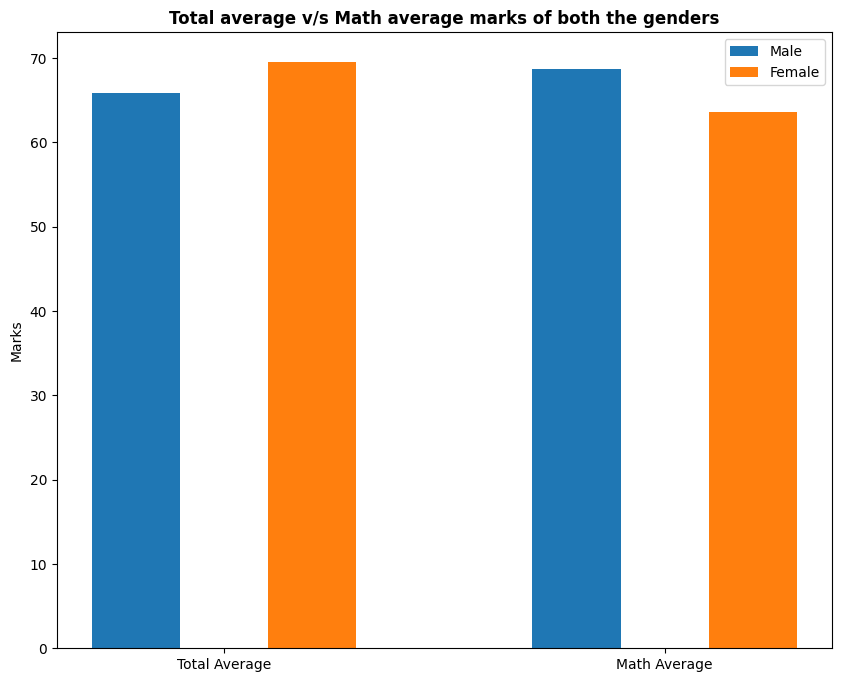

In [26]:
numeric_columns = df.select_dtypes(include='number').columns

# Perform the groupby operation on the numeric columns
gender_group = df.groupby('gender')[numeric_columns].mean()

print(gender_group)
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.2, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.2, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
On an average females have a better overall score than men.
whereas males have scored higher in Maths.

RACE/EHNICITY COLUMN
How is Group wise distribution ?
Is Race/Ehnicity has any impact on student's performance ?
UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

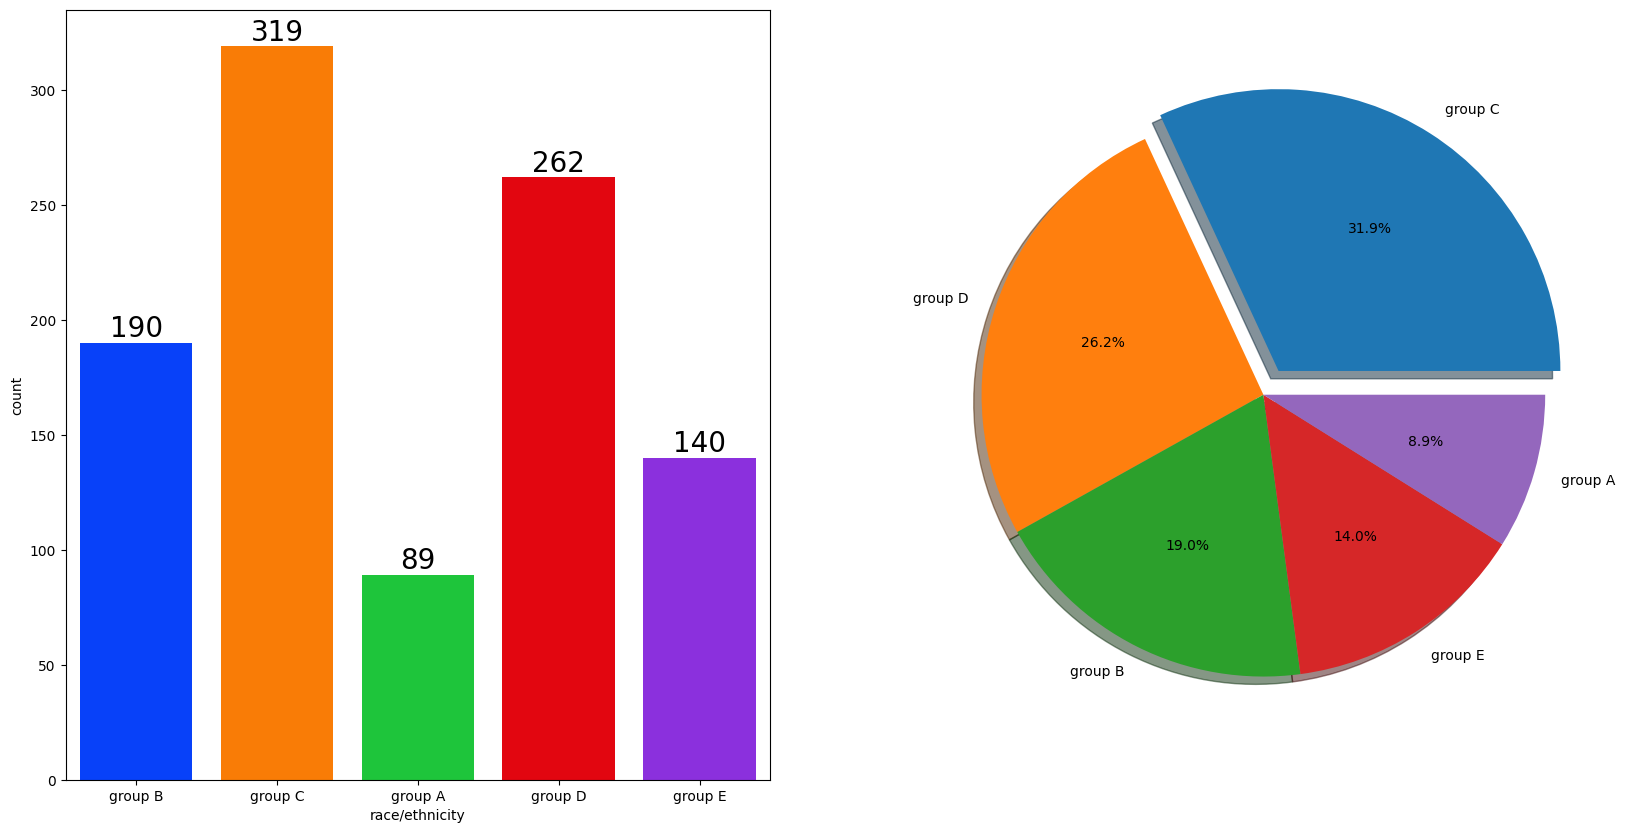

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insights
Most of the student belonging from group C /group D.
Lowest number of students belong to group A.

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

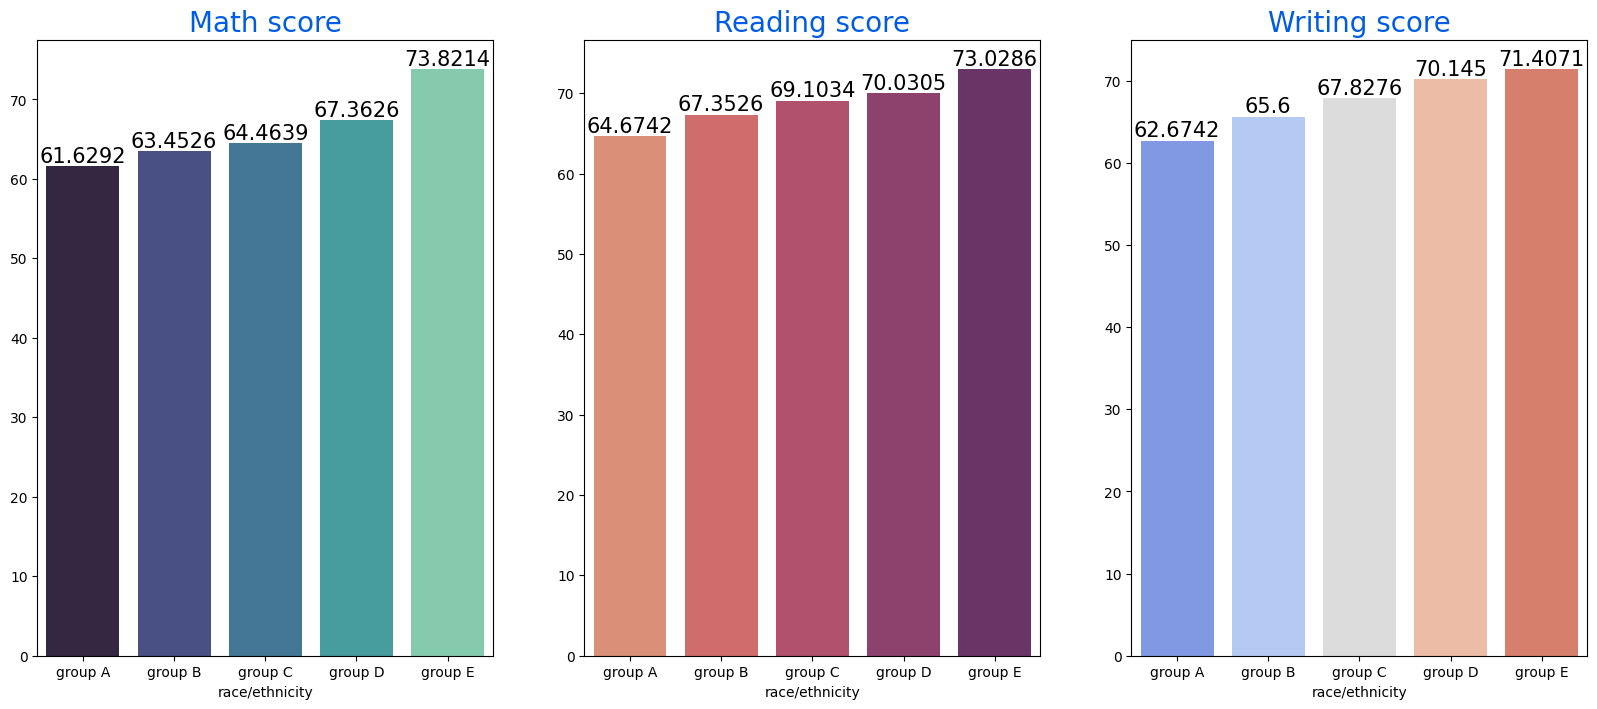

In [28]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights
Group E students have scored the highest marks.
Group A students have scored the lowest marks.
Students from a lower Socioeconomic status have a lower avg in all course subjects


PARENTAL LEVEL OF EDUCATION COLUMN
What is educational background of student's parent ?
Is parental education has any impact on student's performance ?
UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

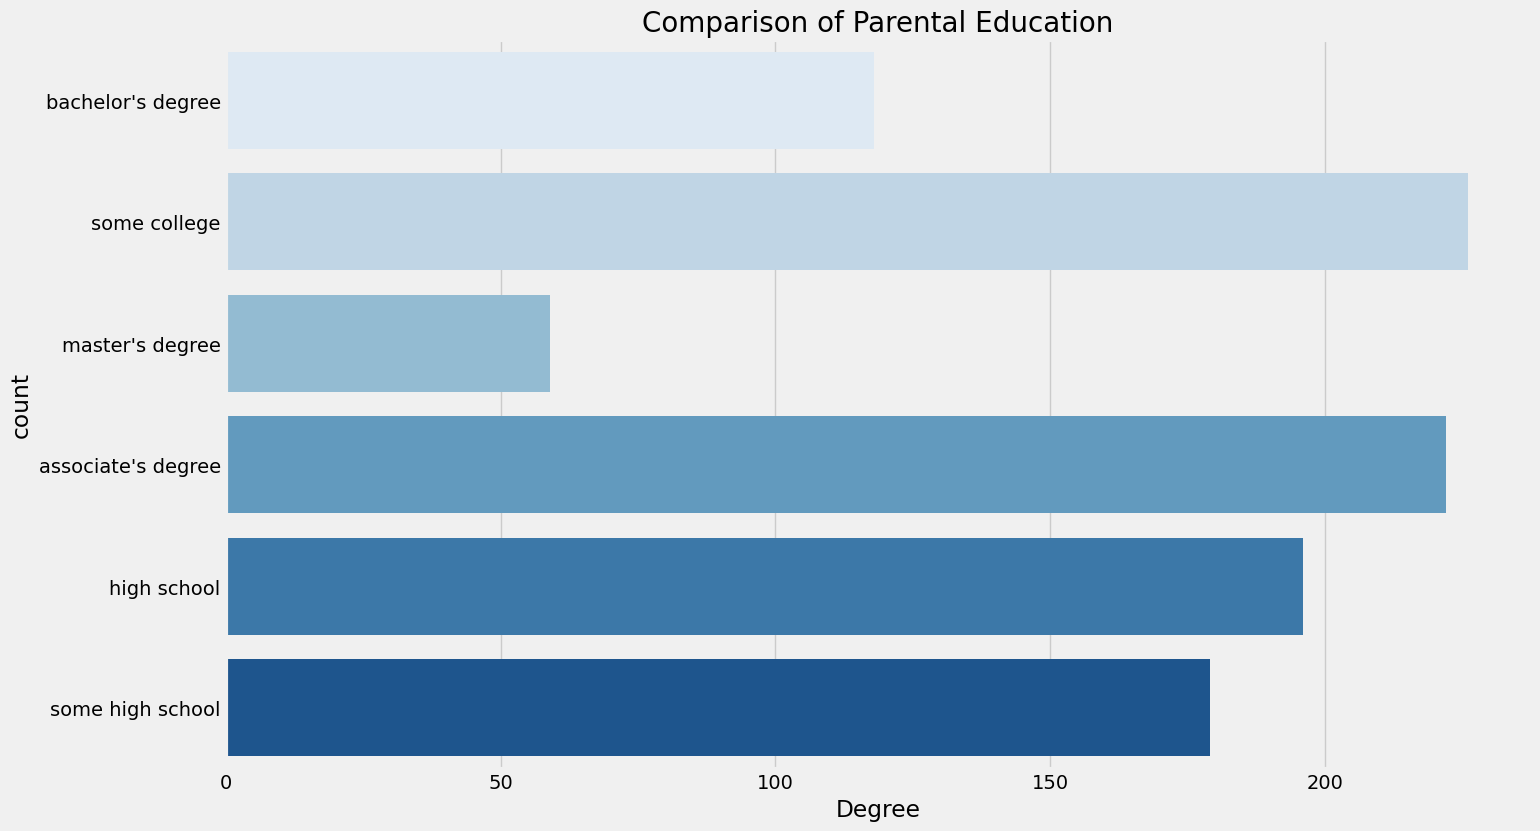

In [29]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

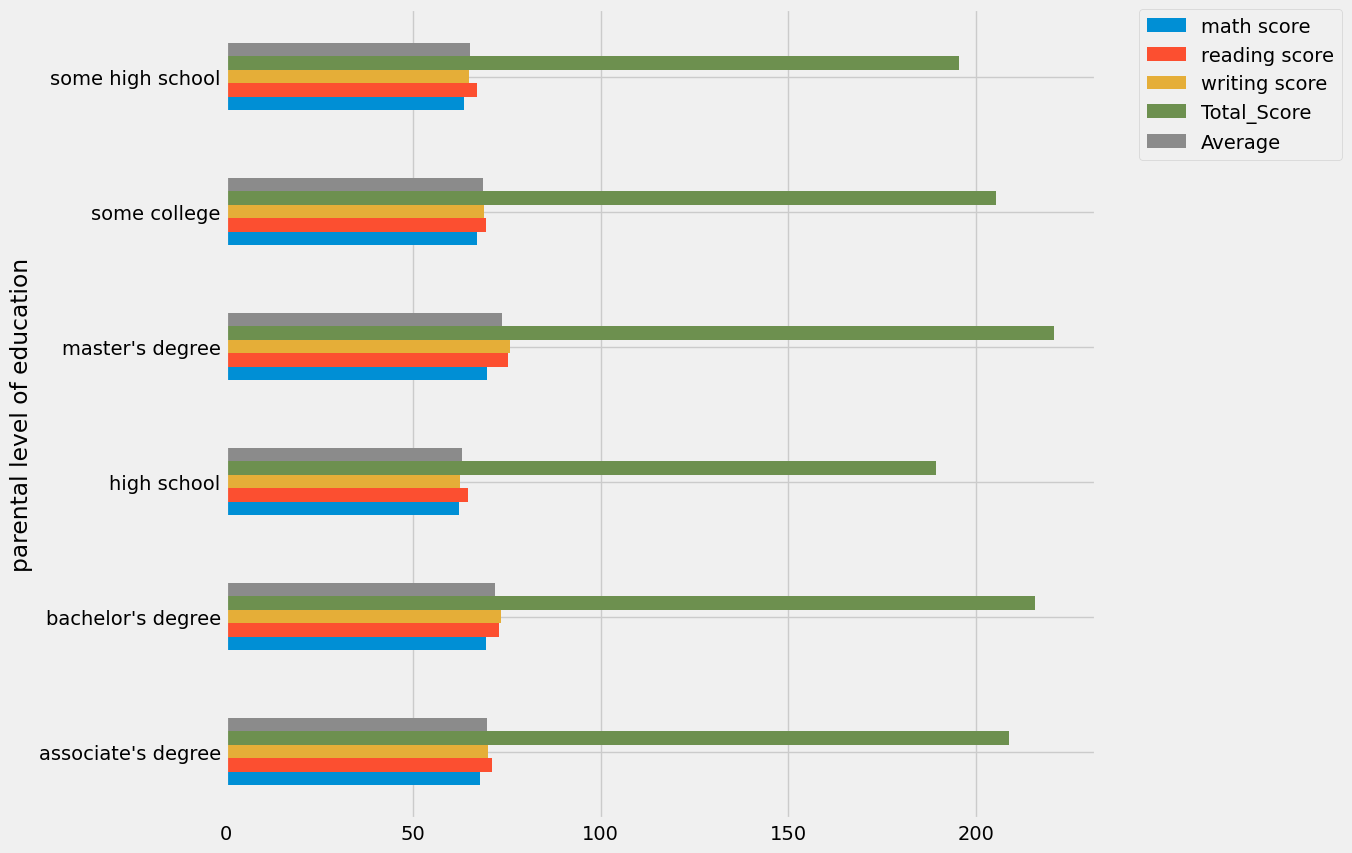

In [31]:
# Select only numeric columns for aggregation
numeric_columns = df.select_dtypes(include='number').columns

# Group by 'parental level of education' and calculate the mean for numeric columns
agg_df = df.groupby('parental level of education')[numeric_columns].mean()

# Plot the results
agg_df.plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights
The score of student whose parents possess master and bachelor level education are higher than others.

LUNCH COLUMN
Which type of lunch is most common amoung students ?
What is the effect of lunch type on test results?

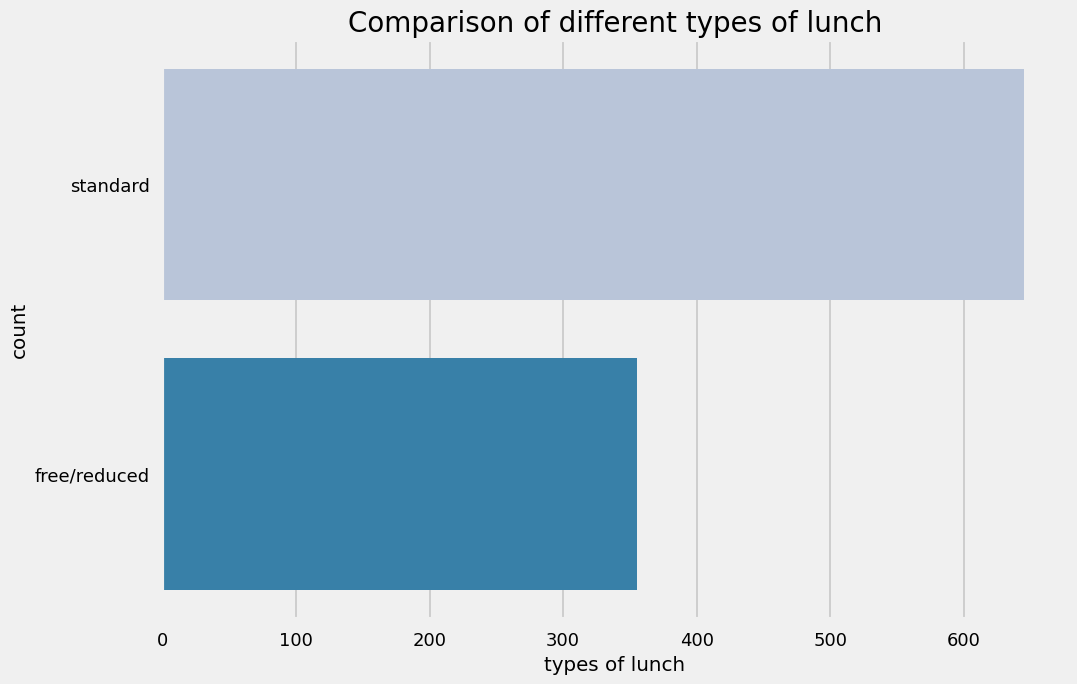

In [32]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights
Students being served Standard lunch was more than free lunch

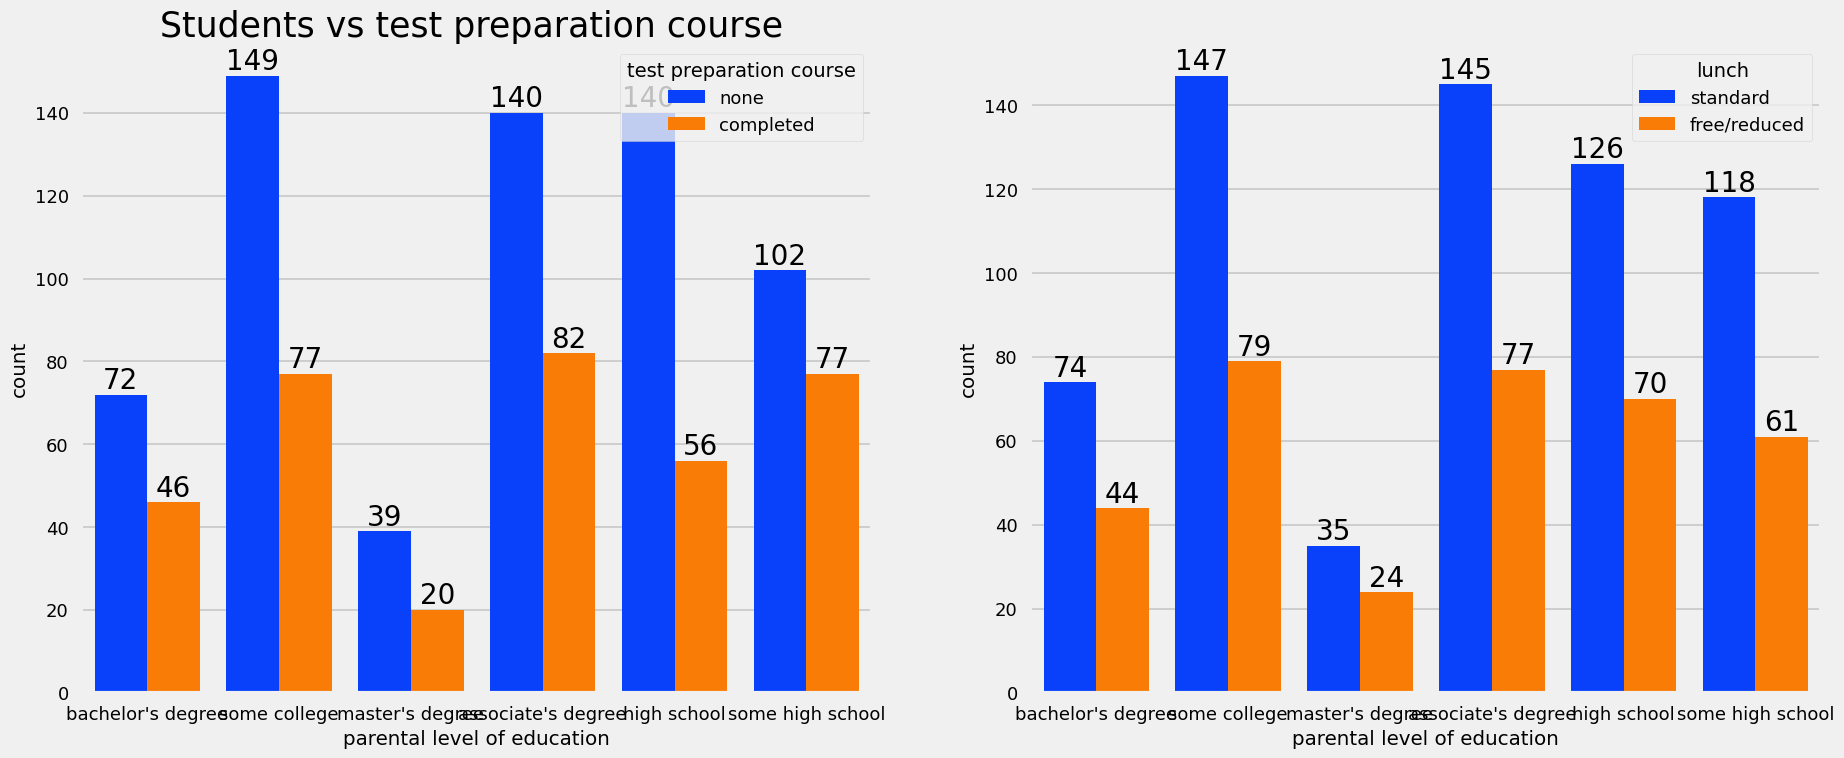

In [33]:
# BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

TEST PREPARATION COURSE COLUMN
Which type of lunch is most common amoung students ?
Is Test prepration course has any impact on student's performance ?
BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

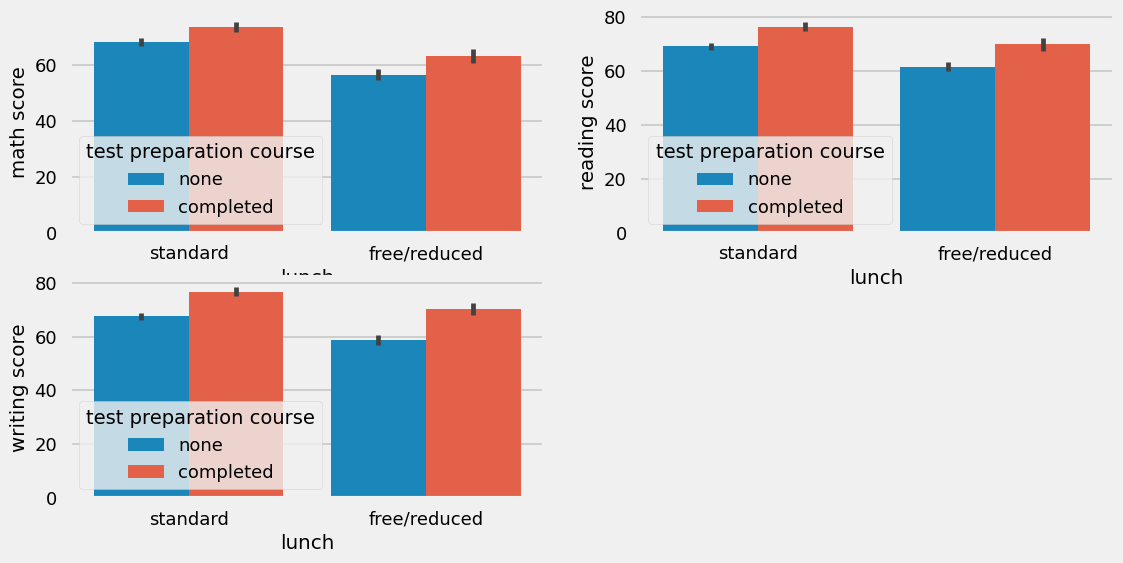

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

Insights
Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

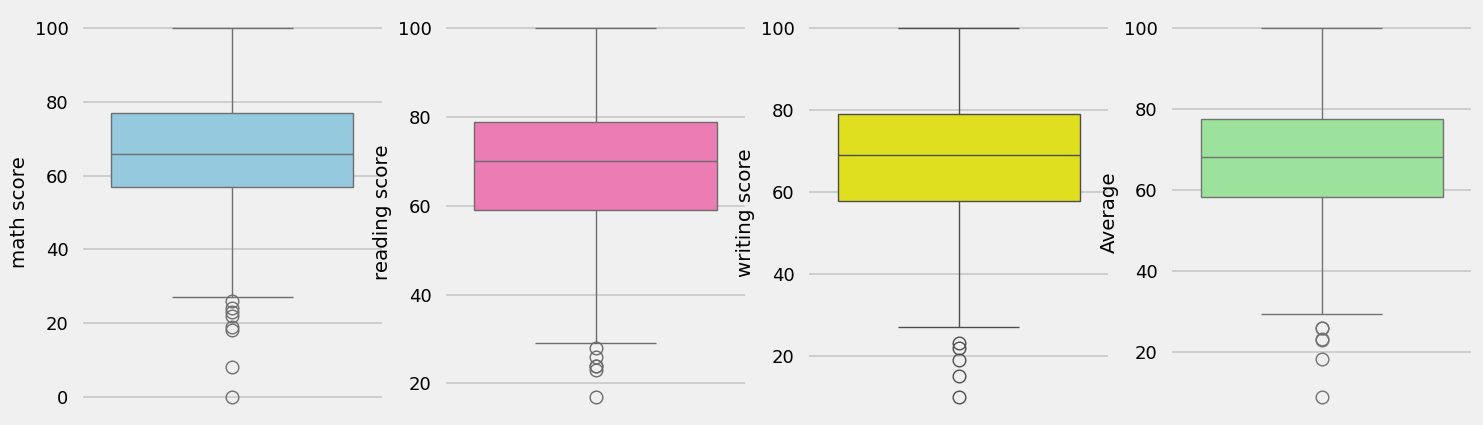

In [36]:
## CHECKING OUTLIERS
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

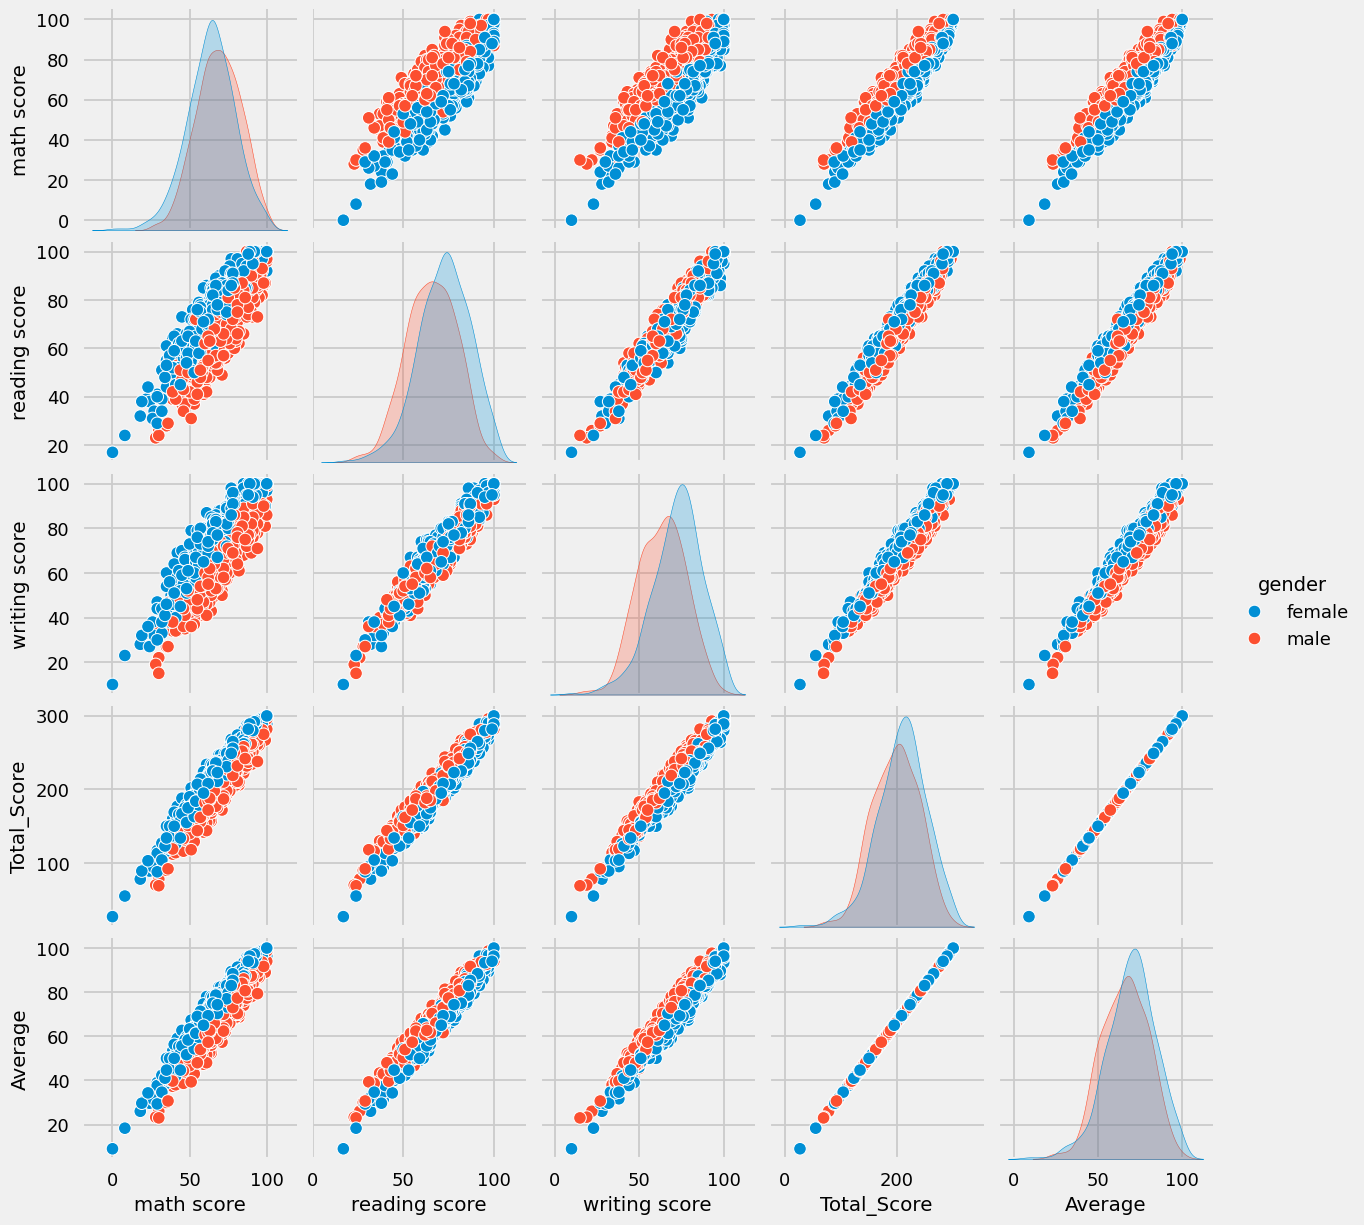

In [37]:
sns.pairplot(df,hue = 'gender')
plt.show()

 Conclusions
Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.